In [21]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    StackingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve, auc
)

In [22]:
df = pd.read_csv('loan_approval_dataset.csv')
df.columns = df.columns.str.strip()
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


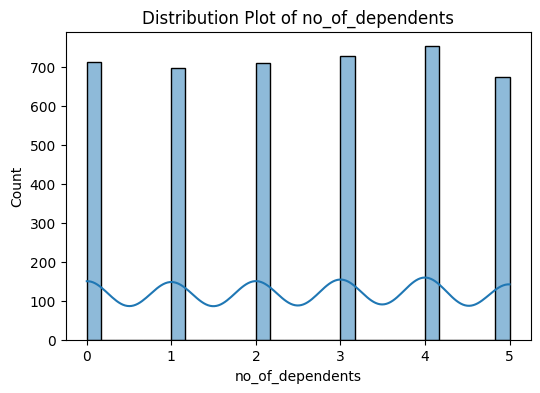

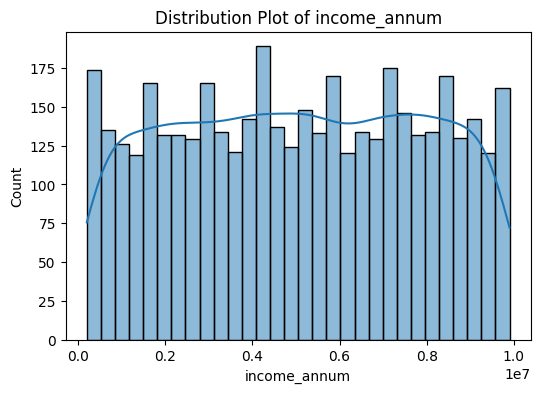

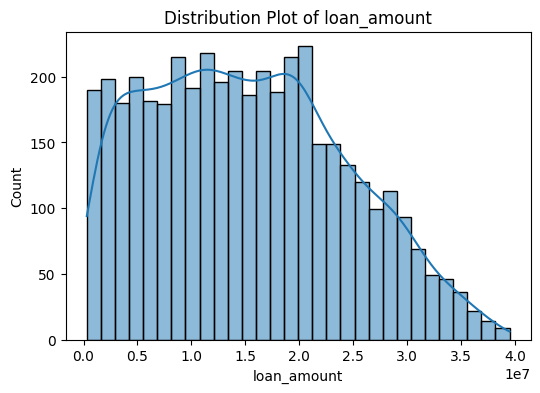

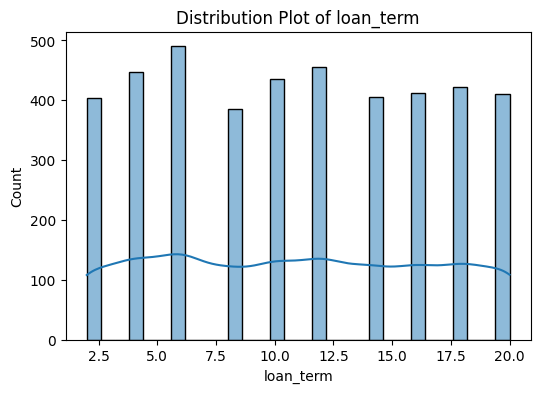

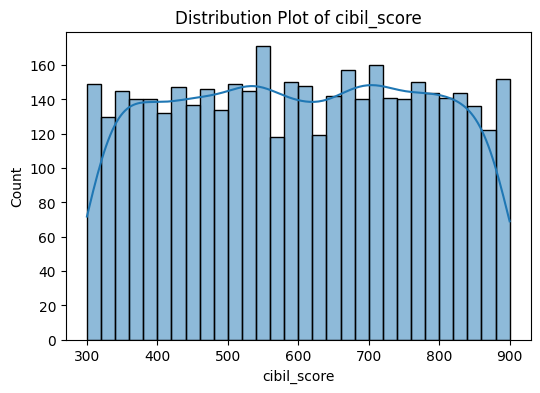

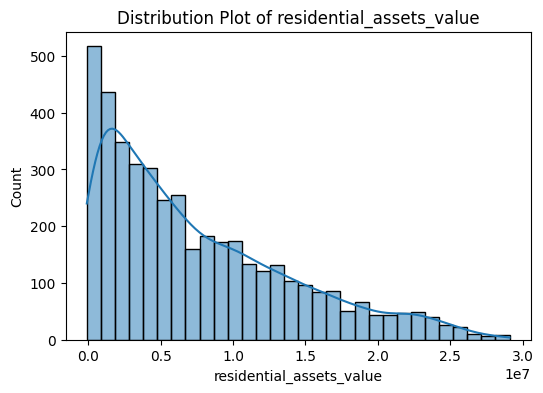

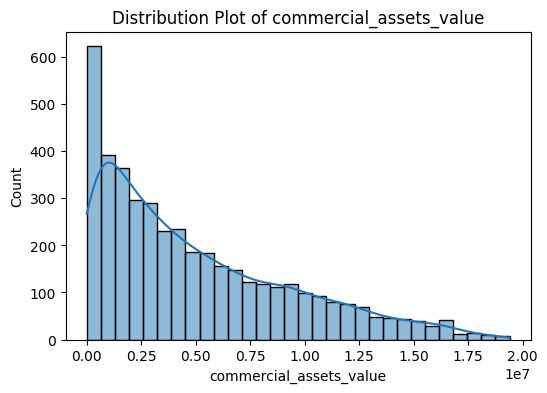

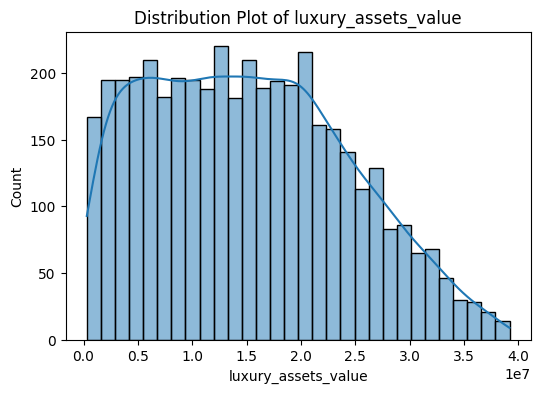

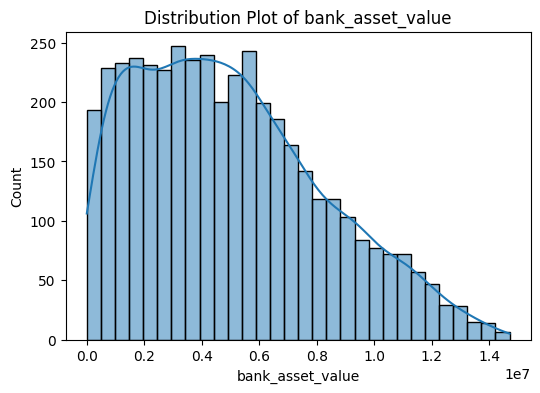

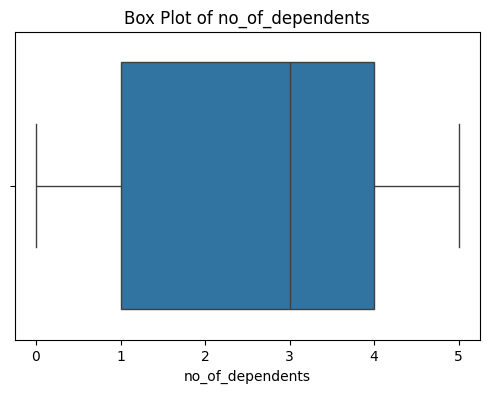

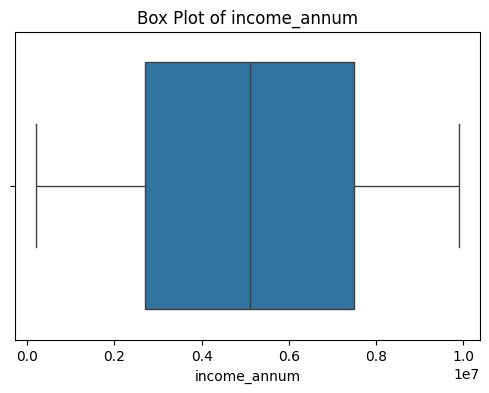

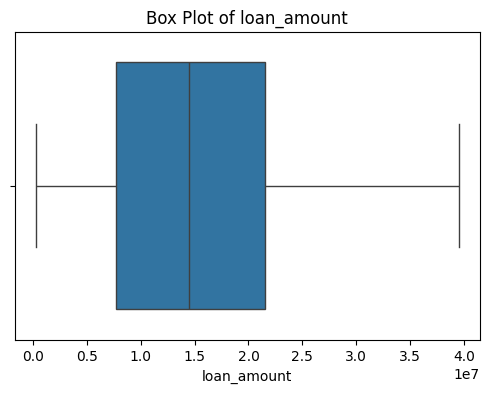

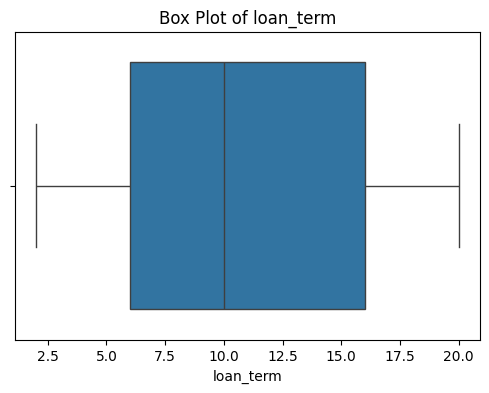

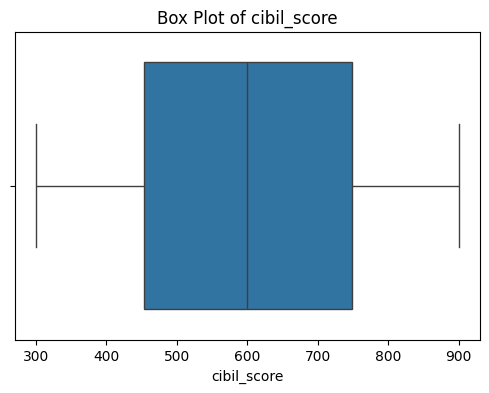

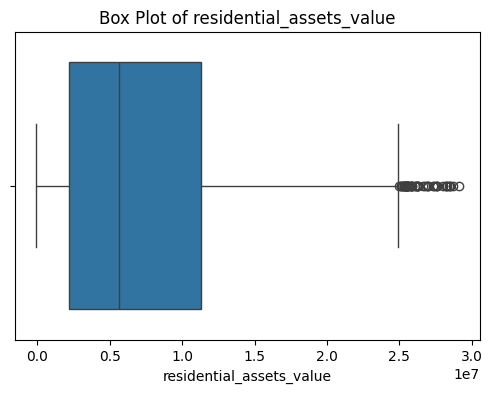

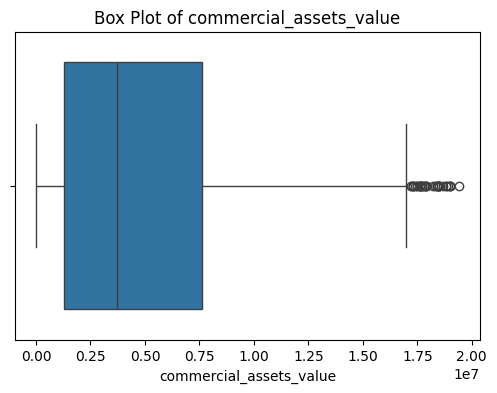

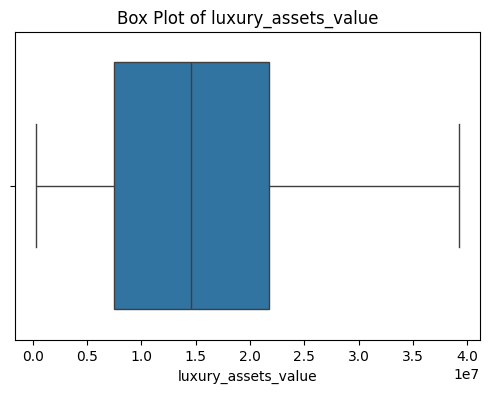

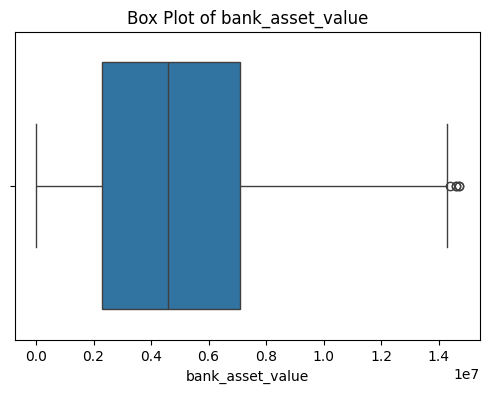

In [23]:

# Visualizing distribution of numerical features
numerical_columns = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 
                     'cibil_score', 'residential_assets_value', 
                     'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution Plot of {col}')
    plt.show()

# Visualizing box plots to check for outliers
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()


In [24]:
df.columns = df.columns.str.strip()
print(df.columns)
df.drop('loan_id', axis=1, inplace=True)

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


In [34]:
le = LabelEncoder()
df['education'] = le.fit_transform(df['education'])
df['self_employed'] = le.fit_transform(df['self_employed'])
df['loan_status'] = le.fit_transform(df['loan_status'])

In [35]:
print(df.columns)


Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')


In [36]:
scaler = StandardScaler()

# Manually define columns to scale, excluding categorical/label fields
columns_to_scale = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 
                    'cibil_score', 'residential_assets_value', 
                    'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


In [37]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,-0.294102,0,0,1.617979,1.633052,0.192617,1.032792,-0.780058,2.877289,0.832028,0.930304,0
1,-1.473548,1,1,-0.341750,-0.324414,-0.508091,-1.061051,-0.733924,-0.631921,-0.694993,-0.515936,1
2,0.295621,0,0,1.439822,1.610933,1.594031,-0.544840,-0.057300,-0.107818,1.996520,2.407316,1
3,0.295621,0,0,1.119139,1.721525,-0.508091,-0.771045,1.649637,-0.381263,0.897943,0.899533,1
4,1.475067,1,1,1.689242,1.002681,1.594031,-1.264055,0.757724,0.735304,1.568075,0.007172,1


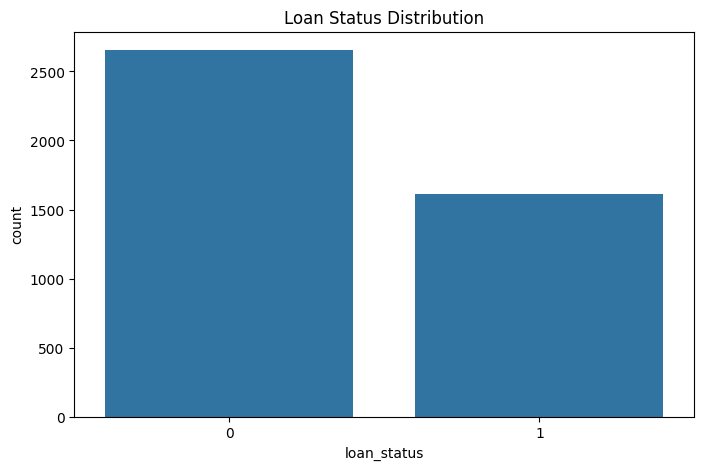

In [38]:
plt.figure(figsize=(8, 5))
sns.countplot(x='loan_status', data=df)
plt.title("Loan Status Distribution")
plt.show()

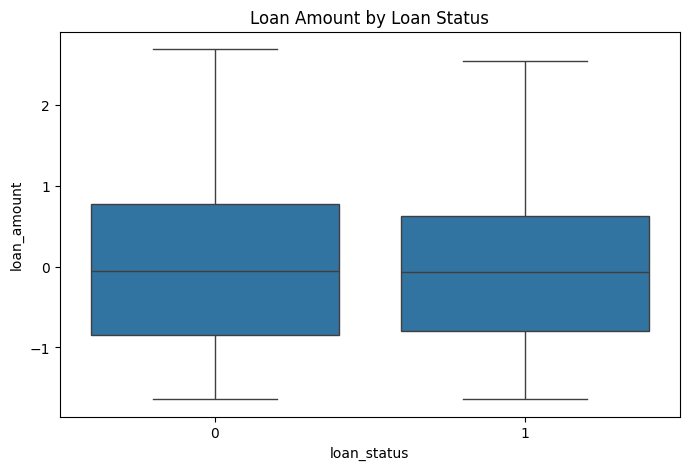

In [39]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='loan_status', y='loan_amount', data=df)
plt.title("Loan Amount by Loan Status")
plt.show()

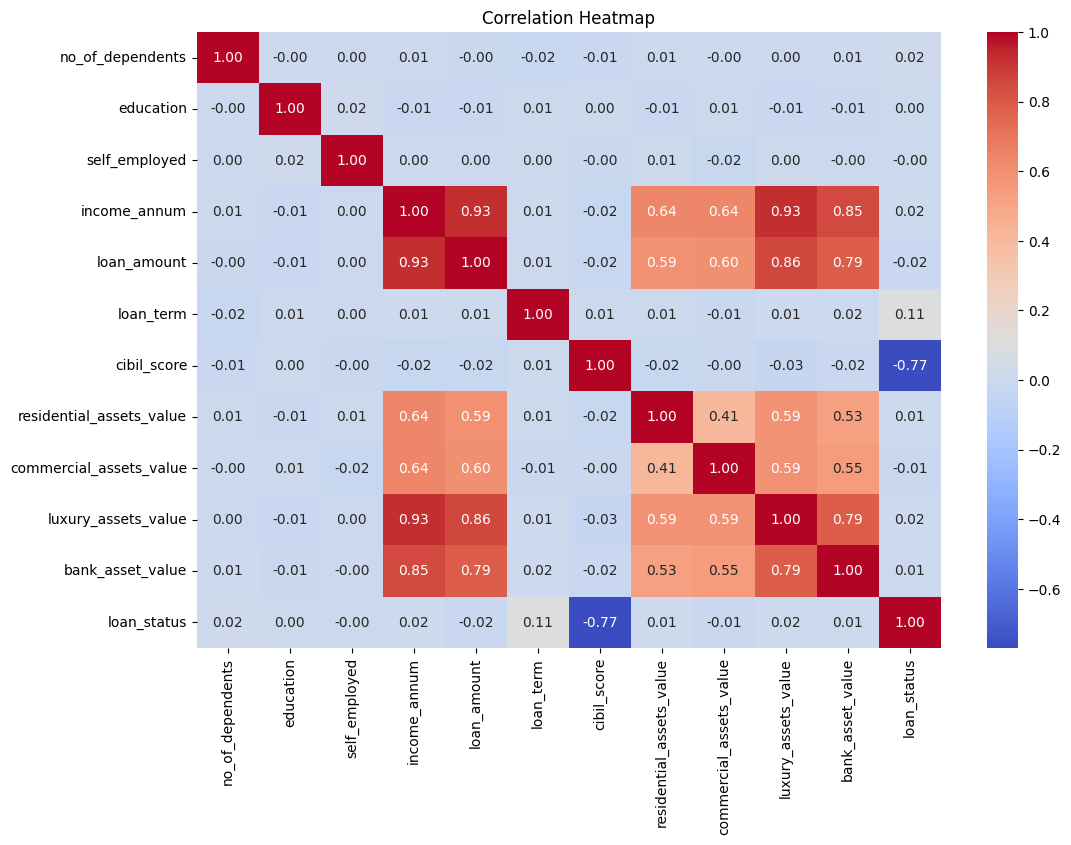

In [40]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

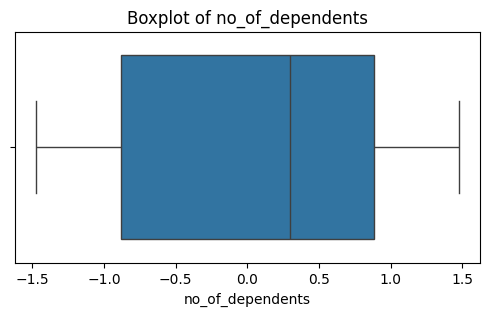

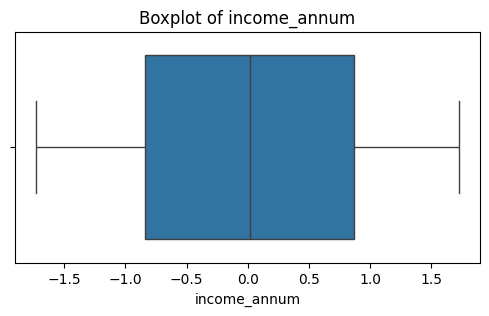

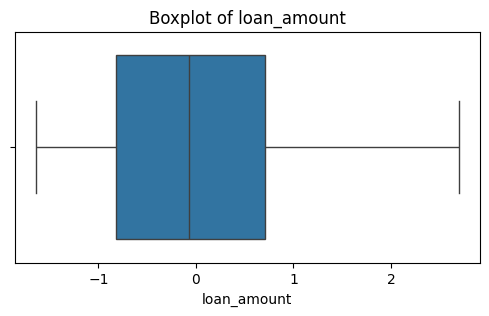

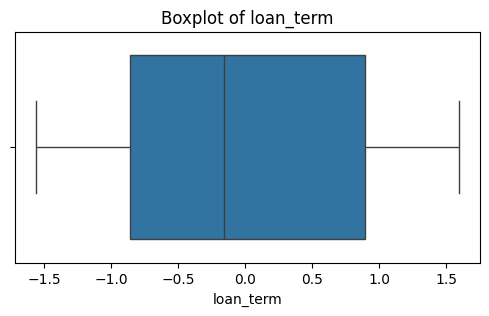

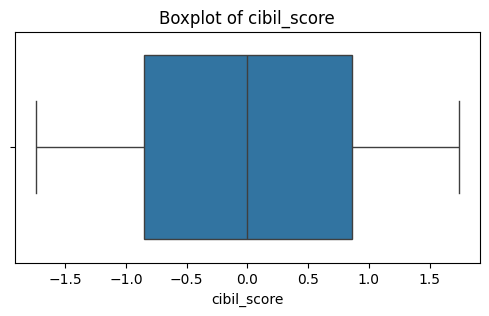

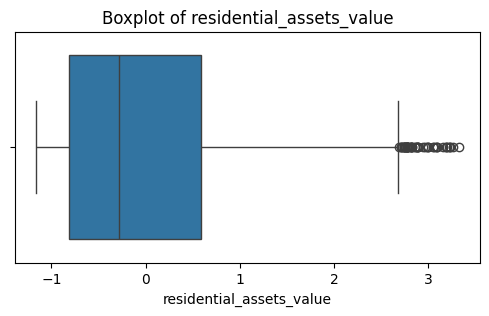

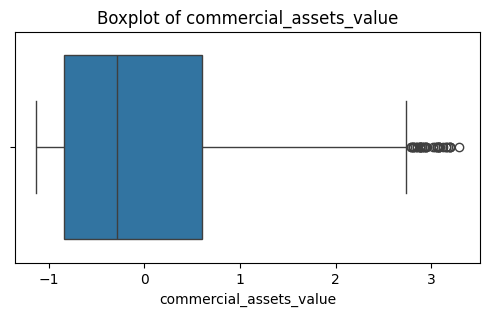

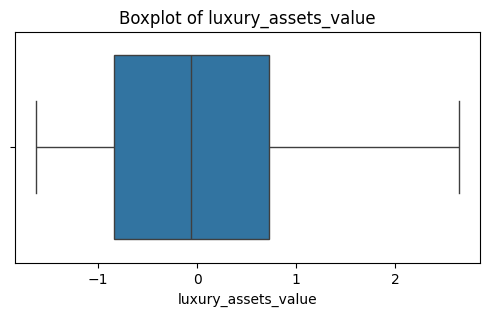

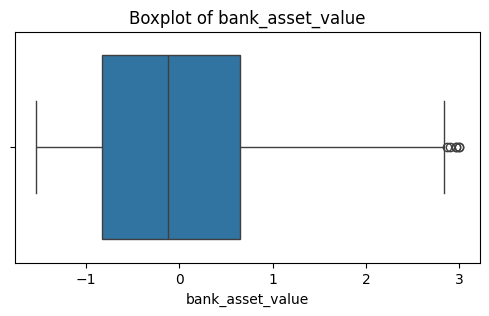

In [41]:
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [42]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
models = {}

# Bagging - Random Forest
models['Bagging'] = RandomForestClassifier(n_estimators=100, random_state=42)

# Boosting - Gradient Boosting
models['Gradient Boosting'] = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Stacking
base_learners = [
    ('lr', LogisticRegression()),
    ('svc', SVC(probability=True)),
    ('dt', DecisionTreeClassifier())
]
models['Stacking'] = StackingClassifier(
    estimators=base_learners,
    final_estimator=RandomForestClassifier(),
    passthrough=True
)


✅ Bagging
Accuracy: 0.9789227166276346
ROC AUC: 0.9984922087674832
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       536
           1       0.98      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



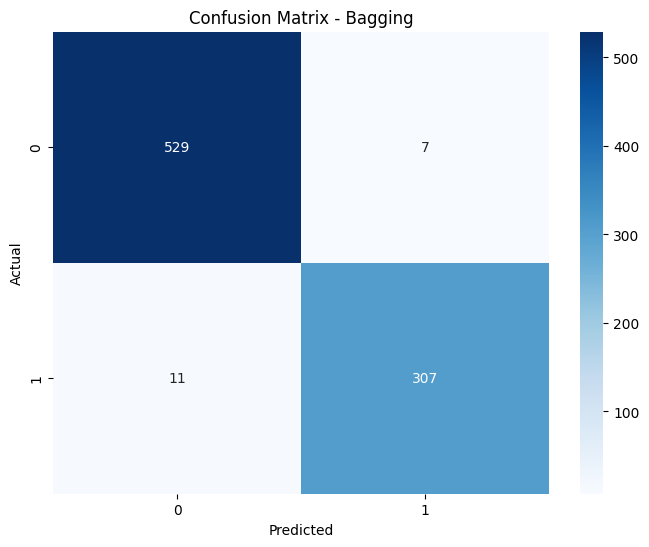


✅ Gradient Boosting
Accuracy: 0.977751756440281
ROC AUC: 0.997703111799493
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       536
           1       0.97      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



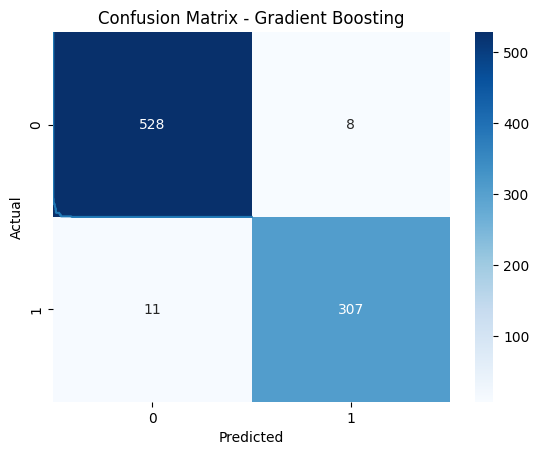


✅ Stacking
Accuracy: 0.9754098360655737
ROC AUC: 0.9977793813949123
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       536
           1       0.97      0.96      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854



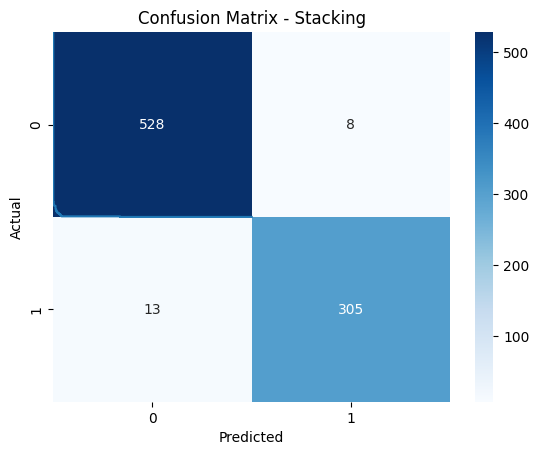

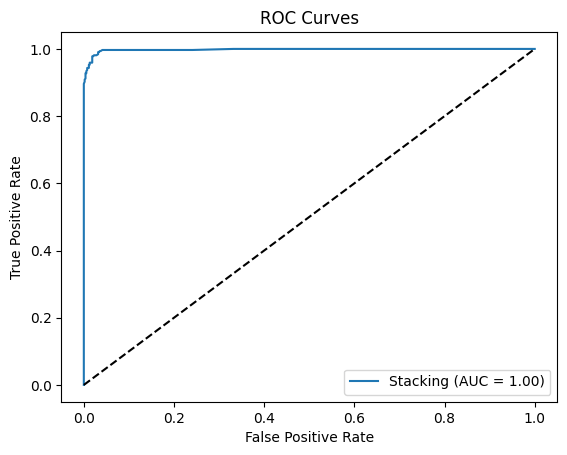

In [45]:
model_results = {}

def evaluate_model(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    print(f"\n✅ {name}")
    print("Accuracy:", acc)
    print("ROC AUC:", roc if roc else "N/A")
    print(classification_report(y_test, y_pred))

    # Save results
    model_results[name] = {'model': model, 'accuracy': acc, 'roc_auc': roc}

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc:.2f})')

# Evaluate all
plt.figure(figsize=(8, 6))
for name, model in models.items():
    evaluate_model(name, model)
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

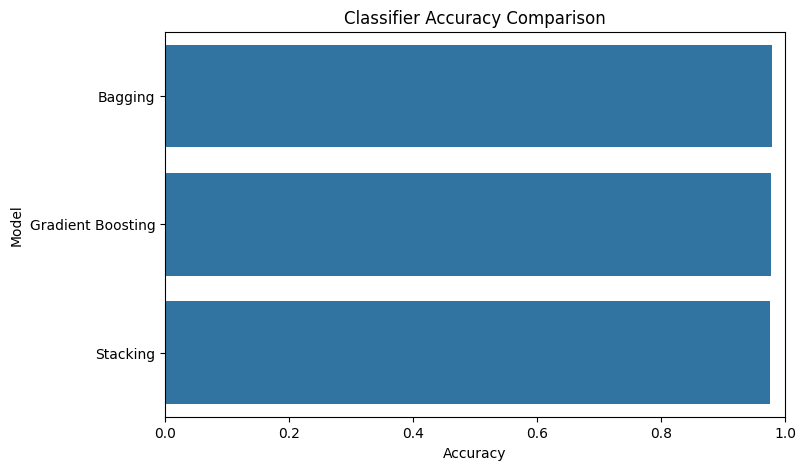

In [46]:
acc_df = pd.DataFrame([
    {'Model': name, 'Accuracy': result['accuracy'], 'ROC AUC': result['roc_auc']}
    for name, result in model_results.items()
])

plt.figure(figsize=(8, 5))
sns.barplot(x='Accuracy', y='Model', data=acc_df)
plt.title("Classifier Accuracy Comparison")
plt.xlim(0, 1)
plt.show()

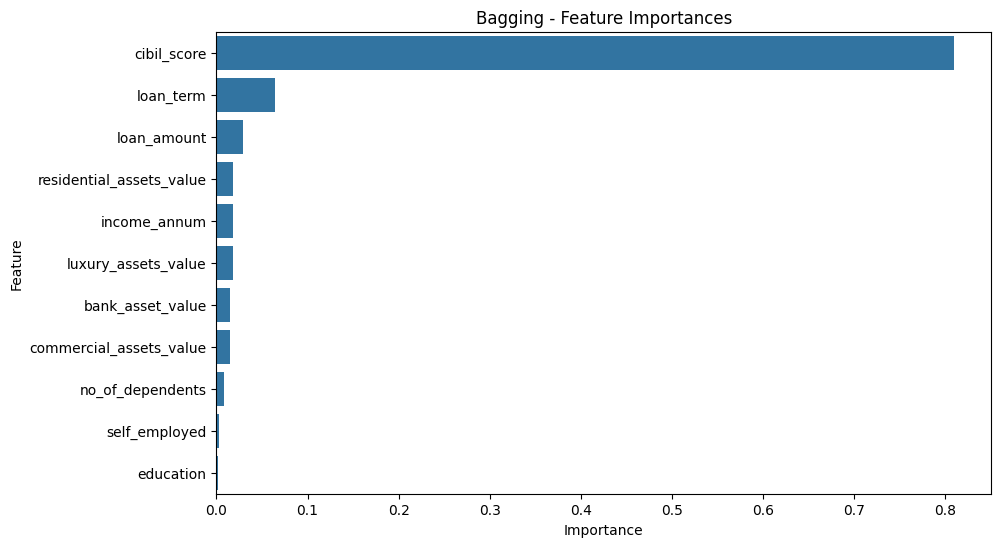

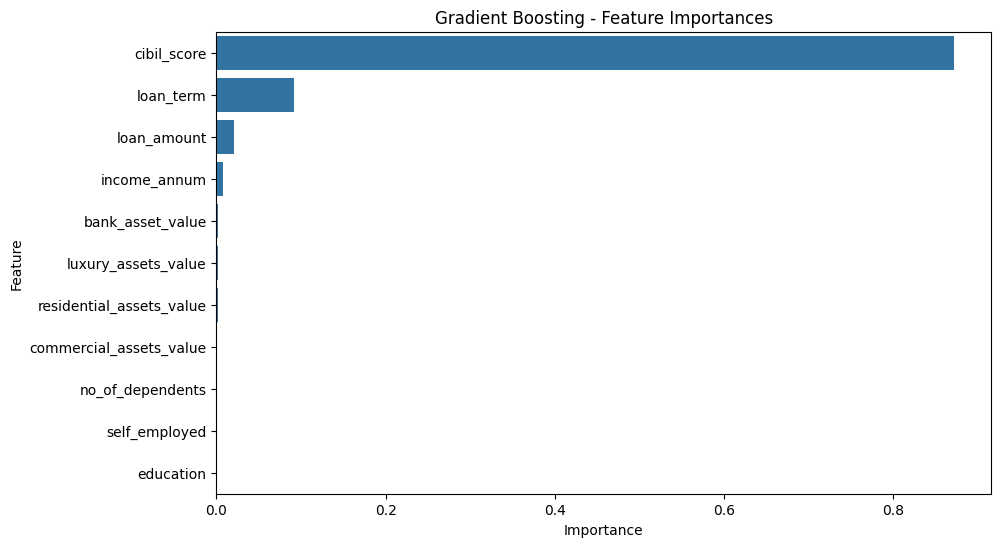

In [50]:
def plot_importance(model, name):
    if hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
        fi_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance}).sort_values(by='Importance', ascending=False)
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=fi_df)
        plt.title(f'{name} - Feature Importances')
        plt.show()

plot_importance(model_results['Bagging']['model'], "Bagging")
plot_importance(model_results['Gradient Boosting']['model'], "Gradient Boosting")

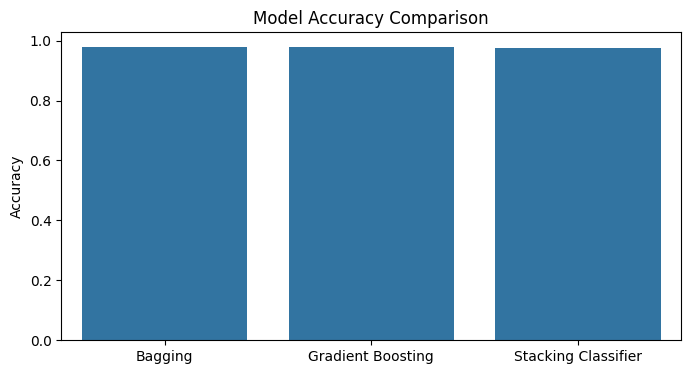

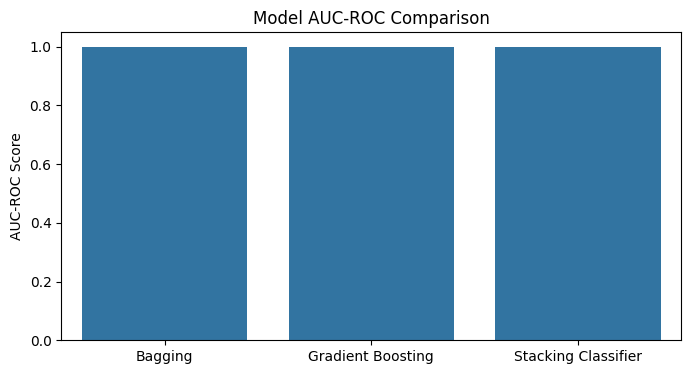

In [52]:

# Comparing classifier performance
models = {
    'Bagging': models['Bagging'],
    'Gradient Boosting': models['Gradient Boosting'],
    'Stacking Classifier': models['Stacking']
}

accuracies = {}
auc_scores = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    accuracies[name] = accuracy_score(y_test, y_pred)
    auc_scores[name] = roc_auc_score(y_test, y_prob)

# Plotting accuracy and AUC-ROC
plt.figure(figsize=(8, 4))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(x=list(auc_scores.keys()), y=list(auc_scores.values()))
plt.title('Model AUC-ROC Comparison')
plt.ylabel('AUC-ROC Score')
plt.show()


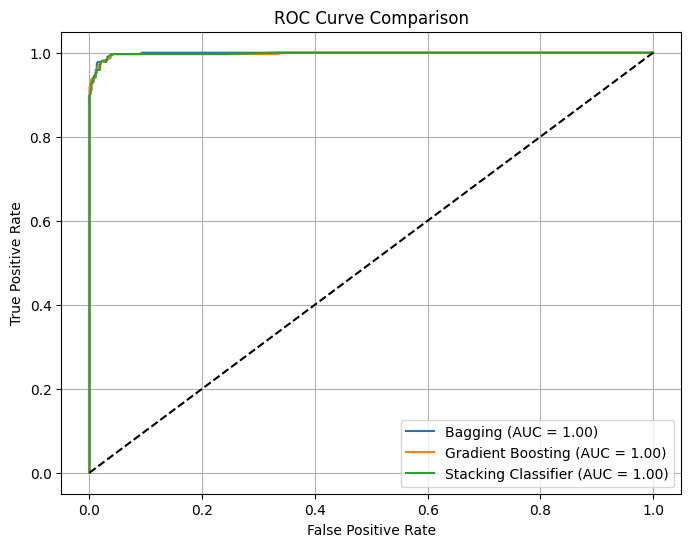

In [53]:

# Plot ROC curves
plt.figure(figsize=(8, 6))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()
